In [102]:
print("Versions of the runtime and packages used for this assignment:")
import sys
print("Python version: {}".format(sys.version))
import pandas as pd
print("pandas version: {}".format(pd.__version__))
import matplotlib
print("matplotlib version: {}".format(matplotlib.__version__))
import numpy as np
print("NumPy version: {}".format(np.__version__))
import sklearn
print("scikit-learn version: {}".format(sklearn.__version__))

print("-------------------------------------------------------")
print("When run on my machine the following versions were used:")
print("Python version: 3.11.4 | packaged by Anaconda, Inc. | (main, Jul  5 2023, 13:38:37) [MSC v.1916 64 bit (AMD64)]")
print("pandas version: 1.5.3")
print("matplotlib version: 3.7.1")
print("NumPy version: 1.24.3")
print("scikit-learn version: 1.3.0")

Versions of the runtime and packages used for this assignment:
Python version: 3.11.4 | packaged by Anaconda, Inc. | (main, Jul  5 2023, 13:38:37) [MSC v.1916 64 bit (AMD64)]
pandas version: 1.5.3
matplotlib version: 3.7.1
NumPy version: 1.24.3
scikit-learn version: 1.3.1
-------------------------------------------------------
When run on my machine the following versions were used:
Python version: 3.11.4 | packaged by Anaconda, Inc. | (main, Jul  5 2023, 13:38:37) [MSC v.1916 64 bit (AMD64)]
pandas version: 1.5.3
matplotlib version: 3.7.1
NumPy version: 1.24.3
scikit-learn version: 1.3.0


In [103]:
from sklearn.utils import Bunch
from functools import reduce

def load_insurance_data_v2(relative_filepath):
    """
    Parse the dataset into a pandas dataframe and return a Bunch object containing the data

    Parameters:
        relative_filepath (str): the relative file path to the dataset
    Returns:
        sklearn.utils.Bunch: a Bunch object containing the dataset and metadata
    """
    # Parse the data from the file into a dataframe
    dataframe = pd.read_csv(relative_filepath)

    # extract the feature names from the dataframe
    feature_names = dataframe.head().columns
    description = f'''\
    Insurance dataset
    --------------------

    **Data Set Characteristics:**

        :Number of Instances: 2000
        :Number of Features: 4 (5 including target)
        :Feature Information:
            - client identifier
            - income
            - age
            - loan (amount)
            - default (binary)
    '''
    # Create a dictionary to store the dataset and its relevant metadata
    bunch_data = {
       'data': dataframe,
       'target_feature_name': 'default',
       'feature_names': feature_names,
       'DESCR': description,
       'filename': relative_filepath.split('/')[-1]
    }
    # return a Bunch object containing the data
    return Bunch(**bunch_data)

In [104]:
relative_filepath = './data/original.csv'
# load the dataset by parsing the file at the specified relative filepath
dataset = load_insurance_data_v2(relative_filepath)

print("{}".format(dataset.DESCR))
print("Filename {}".format(dataset.filename))
print("Feature Names {}".format(dataset.feature_names.to_list()))
print("Target Feature {}".format(dataset.target_feature_name))
print("Data Shape {}".format(dataset.data.shape))
dataset.data

    Insurance dataset
    --------------------

    **Data Set Characteristics:**

        :Number of Instances: 2000
        :Number of Features: 4 (5 including target)
        :Feature Information:
            - client identifier
            - income
            - age
            - loan (amount)
            - default (binary)
    
Filename original.csv
Feature Names ['clientid', 'income', 'age', 'loan', 'default']
Target Feature default
Data Shape (2000, 5)


,clientid,income,age,loan,default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1
...,...,...,...,...,...
1995,1996,59221.044874,48.518179,1926.729397,0
1996,1997,69516.127573,23.162104,3503.176156,0
1997,1998,44311.449262,28.017167,5522.786693,1
1998,1999,43756.056605,63.971796,1622.722598,0


In [105]:
# Identify if the dataset contains any missing values
print(dataset.data.isnull().sum())

clientid    0
income      0
age         3
loan        0
default     0
dtype: int64


In [106]:
# If there are missing values, a variety of strategies can be applied to handle missing data including:
# - dropping instances with missing values
# - apply imputation to replace missing values with estimated values

# replace missing values using the mean along each column. Can only be used with numeric data.
mean_strategy = 'mean'

# replace missing values using the median along each column. Can only be used with numeric data.
median_strategy = 'median'

# replace missing using the most frequent value along each column. Can be used with strings or numeric data. If there is more than one such value, only the smallest is returned.
most_frequent_strategy = 'most_frequent'

# replace missing values with fill_value. Can be used with strings or numeric data.
constant_strategy = 'constant'

# remove instances with missing values
drop_strategy = 'drop'

def preprocess_instances_with_missing_values(dataframe, strategy=mean_strategy):
    """
    Preprocess the dataset to handle missing values

    Parameters:
        dataframe (pandas.DataFrame): the dataframe to preprocess
        strategy (str): the strategy to use to handle missing values
    Returns:
        pandas.DataFrame: the preprocessed dataframe
    """
    if strategy == 'drop':
        return drop_missing_values(dataframe)
    else:
        return impute_missing_values(dataframe, strategy=strategy)

def drop_missing_values(dataframe):
    """
    Drop instances with missing values

    Parameters:
        dataframe (pandas.DataFrame): the dataframe to drop missing values for
    Returns:
        pandas.DataFrame: the dataframe with missing values dropped
    """
    return dataframe.dropna()

def impute_missing_values(dataframe, strategy=mean_strategy):
    """
    Impute missing values using the specified strategy

    Parameters:
        dataframe (pandas.DataFrame): the dataframe to impute missing values for
        strategy (str): the strategy to use to impute missing values
    Returns:
        pandas.DataFrame: the dataframe with imputed values
    """
    from sklearn.impute import SimpleImputer
    # construct an instance of SimpleImputer to impute missing values
    imputer = SimpleImputer(strategy=strategy)
    # impute the missing values
    imputed_values = imputer.fit_transform(dataframe)
    # return the imputed values as a new dataframe
    return pd.DataFrame(imputed_values, columns=dataframe.columns)

In [123]:
# Remove instances with missing values by using the drop strategy
X_without_missing_values = preprocess_instances_with_missing_values(
    dataset.data,
    strategy=mean_strategy
)
# Verify that there are no missing values
X_without_missing_values

,clientid,income,age,loan,default
0,1.0,66155.925095,59.017015,8106.532131,0.0
1,2.0,34415.153966,48.117153,6564.745018,0.0
2,3.0,57317.170063,63.108049,8020.953296,0.0
3,4.0,42709.534201,45.751972,6103.642260,0.0
4,5.0,66952.688845,18.584336,8770.099235,1.0
...,...,...,...,...,...
1995,1996.0,59221.044874,48.518179,1926.729397,0.0
1996,1997.0,69516.127573,23.162104,3503.176156,0.0
1997,1998.0,44311.449262,28.017167,5522.786693,1.0
1998,1999.0,43756.056605,63.971796,1622.722598,0.0


In [124]:
# Identify if any rows have negative values for any feature
# since age, income, and loan amount cannot be negative.
print((X_without_missing_values < 0).sum())


clientid    0
income      0
age         3
loan        0
default     0
dtype: int64


In [108]:
# The data collection system has collected negative values for the age. These values are invalid and should be preprocessed.

# We can either:
# - drop the instances with negative values
# - replace the negative values with positive values

# replace negative values with positive values
replace_negative_values_strategy = 'replace_negative_values'

# drop instances with negative values
drop_negative_values_strategy = 'drop_negative_values'

def preprocess_negative_values(dataframe, strategy=replace_negative_values_strategy):
    """
    Preprocess the dataset to handle negative values

    Parameters:
        dataframe (pandas.DataFrame): the dataframe to preprocess
        strategy (str): the strategy to use to handle negative values
    Returns:
        pandas.DataFrame: the preprocessed dataframe
    """
    if strategy == 'drop_negative_values':
        return drop_negative_values(dataframe)
    else:
        return replace_negative_values(dataframe)
    
def drop_negative_values(dataframe):
    """
    Drop instances with negative values

    Parameters:
        dataframe (pandas.DataFrame): the dataframe to drop negative values for
    Returns:
        pandas.DataFrame: the dataframe with negative values dropped
    """
    return dataframe[dataframe['age'] >= 0]

def replace_negative_values(dataframe):
    """
    Replace negative values with positive values

    Parameters:
        dataframe (pandas.DataFrame): the dataframe to replace negative values for
    Returns:
        pandas.DataFrame: the dataframe with negative values replaced
    """
    dataframe['age'] = dataframe['age'].abs()
    return dataframe


In [109]:
# Remove instances with missing values by using the drop strategy
X_without_missing_or_negative_values = preprocess_negative_values(
    X_without_missing_values,
    strategy=replace_negative_values_strategy
)
# Verify that there are no missing values
X_without_missing_or_negative_values

,clientid,income,age,loan,default
0,1.0,66155.925095,59.017015,8106.532131,0.0
1,2.0,34415.153966,48.117153,6564.745018,0.0
2,3.0,57317.170063,63.108049,8020.953296,0.0
3,4.0,42709.534201,45.751972,6103.642260,0.0
4,5.0,66952.688845,18.584336,8770.099235,1.0
...,...,...,...,...,...
1995,1996.0,59221.044874,48.518179,1926.729397,0.0
1996,1997.0,69516.127573,23.162104,3503.176156,0.0
1997,1998.0,44311.449262,28.017167,5522.786693,1.0
1998,1999.0,43756.056605,63.971796,1622.722598,0.0


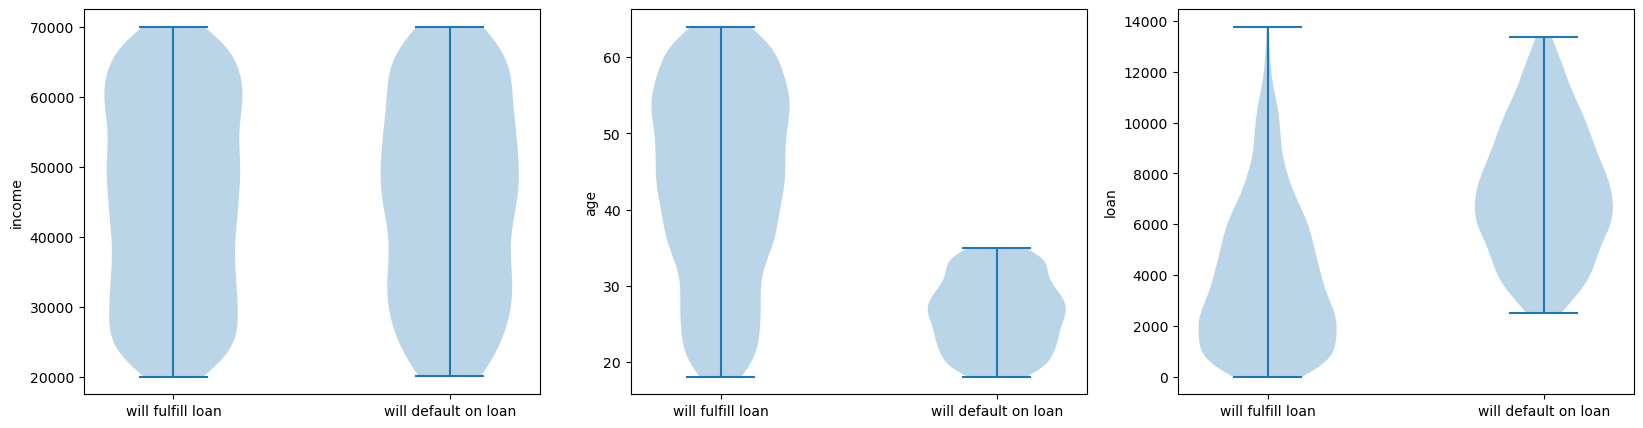

In [126]:
# We can visualize the relationships between each feature and the target feature
# to determine if there are any obvious relationships between a feature and the target feature.
from matplotlib import pyplot as plt
# Create a 1x3 grid of subplots to display a plot for each feature
number_of_rows = 1
number_of_columns = 3
# Set the size of the figure.
twenty_inch_by_five_inch_figure_size = (20, 5)

# Create a figure, fig, and a set of subplots, axes, arranged in a 2x3 grid
fig, axes = plt.subplots(
    nrows=number_of_rows,
    ncols=number_of_columns,
    figsize=twenty_inch_by_five_inch_figure_size
)

# Visualize each feature with respect to the target feature
# except for the clientid feature
# since it is not relevant to the classification task
selected_features = [
    feature for
    feature in dataset.feature_names
    if feature not in ['clientid', 'default']
]

for feature_index in range(len(selected_features)):
    # Index of the column in the 1x3 grid
    column = feature_index % number_of_columns
    # obtain a subplot at the specified position
    subplot = axes[column]
    # name of the feature at the current index
    feature_name = selected_features[feature_index]
    # feature_index is relative to a subset of the features, therefore
    # determine the index of the feature relative to all features
    feature_index_relative_to_all_features = dataset.feature_names.to_list().index(feature_name)
    # vector of target feature values
    target_vector = X_without_missing_or_negative_values[dataset.target_feature_name]
    # true if the target feature value is 0, false otherwise
    will_fulfill_loan = target_vector == 0
    # true if the target feature value is 1, false otherwise
    will_default_on_loan = target_vector == 1
    # indices of the rows classified as a loan that will be fulfilled
    indices_for_fulfilling_loan = X_without_missing_or_negative_values.index[will_fulfill_loan]
    # indices of the rows classified as a loan that will be defaulted on
    indices_for_defaulting_on_loan = X_without_missing_or_negative_values.index[will_default_on_loan]
    # vector of feature values for the rows classified as a loan that will be fulfilled
    feature_for_fulfilling_loan = X_without_missing_or_negative_values.loc[
        indices_for_fulfilling_loan,
        feature_name
    ]
    # vector of feature values for the rows classified as a loan that will be defaulted on
    feature_for_defaulting_on_loan = X_without_missing_or_negative_values.loc[
        indices_for_defaulting_on_loan,
        feature_name
    ]
    # set of vectors of feature values for each target feature value
    distribution_of_feature_values_per_classification = [
        feature_for_fulfilling_loan,
        feature_for_defaulting_on_loan
    ]
    # plot the density of feature values for each target feature value
    violin_parts = subplot.violinplot(distribution_of_feature_values_per_classification)
    # label the y axis with the feature name
    subplot.set_ylabel(feature_name)
    # constrain the x axis to include two labels
    subplot.set_xticks([1, 2])
    # Provide friendly names for the x axis labels
    subplot.set_xticklabels(['will fulfill loan', 'will default on loan'])

plt.show()

In [111]:
# Observations:

# Older people are more likely to fulfill a loan
# 30 year olds are more likely to default on a loan
# Small loan amounts are more likely to be fulfilled
# Medium loan amounts are more likely to be defaulted on
# Income doesn't appear to have a strong relationship with the target feature

In [112]:
from sklearn.model_selection import train_test_split

# seed to random number generator to make output deterministic when shuffling the dataset
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
seed_to_make_output_deterministic = 0

# percentage of the dataset to use for testing
twenty_percent_of_data_size = 0.20

# extract the feature matrix from the dataframe
X = X_without_missing_or_negative_values.drop(columns=[dataset.target_feature_name])
# extract the target vector from the dataframe
y = X_without_missing_or_negative_values[dataset.target_feature_name]

# split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    random_state=seed_to_make_output_deterministic,
    test_size=twenty_percent_of_data_size
)

In [113]:
# Attempt to perform hyperparamter tuning
# to find the optimal values for the parameters of SVM classifier
from sklearn import svm
from sklearn.model_selection import GridSearchCV

# Hyperparameter tuning is computationally expensive and can take a long time to run
# To speed up the process, we can use Azure ML to run the code on a GPU
# Feel free to set to true on your development machine if you can wait for the results
is_running_in_azure_ml_workspace_on_gpu = False

# Make a guess at the range of values for gamma and c, using the logarithmic scale to increase the range of values
logarithmic_scale = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
# set of kernel tricks to try
kernel_tricks = ['linear', 'rbf']

# Default gamma = 1 / (number_of_features * X.var())
scale = 'scale'
# Alternative gamma = 1 / number_of_features
auto = 'auto'

# regularization l2 penalty parameter
regularization_parameter = 'C'

# Kernel coefficient for 'rbf', 'poly' and 'sigmoid'
gamma_parameter = 'gamma'

# Specifies the kernel type to be used in the algorithm
kernel_parameter = 'kernel'

# Size of the kernel cache in MB
# The kernel cache is used to store the Gram matrix between calls to fit
# If the size of the cache is too small, the run time for the algorithm will increase
four_thousand_megabytes = 4000

# Define the hyperparameters to tune such that
# the keys of the dictionary are the names of the arguments to the constructor of the model
# and the values of the dictionary are lists of values to try for a particular hyperparameter.
hyperparameter_grid = {
    kernel_parameter: kernel_tricks,
    regularization_parameter: logarithmic_scale,
    gamma_parameter: logarithmic_scale + [scale, auto],
    'cache_size': [four_thousand_megabytes]
}

# create an instance of a classifier
classifier = svm.SVC()

# Apply a cross validation technique used evaluate the model on a limited dataset
# Divide the data set into k equal subsets and use k-1 subsets to train the model and the remaining subset to test the model
# This method is known as k-fold cross-validation because the subsets are referred to as folds and k refers to the number of folds
five_fold_cross_validation = 5

# create an instance of the GridSearchCV class
grid_search = GridSearchCV(
    estimator=classifier,
    param_grid=hyperparameter_grid,
    cv=five_fold_cross_validation,
)

# Avoid running hyperparameter tuning on your local machine if possible
# as it can take a long time to run
if (is_running_in_azure_ml_workspace_on_gpu):
    # Fit the grid search object to the data
    grid_search.fit(X_train, y_train)

    # print the best hyperparameters and accuracy score
    print("Best hyperparameters: ", grid_search.best_params_)
    print("Accuracy score: ", grid_search.best_score_)


In [114]:
# The best hyperparameters are the ones that maximize the accuracy score
best_hyperparameters = {
    kernel_parameter: 'linear',
    regularization_parameter: 0.01,
    gamma_parameter: 0.001
}

# construct an instance of a classifier with the best hyperparameters
classifier = svm.SVC(**best_hyperparameters)

# train the model using the training set
classifier.fit(X_train, y_train)

# vector of predictions arrived at by the model
y_pred = classifier.predict(X_test)

# evaluate the model's performance
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {}".format(accuracy))



Accuracy: 0.9475


In [115]:
# If the model performed well on the training data
# but not as well on the testing data then model might be overfitting the training data

# Although, the model does not appear to be overfitting the training data,
# we get more confidence that the model is not overfitting with cross validation.
# We used a k-fold cross validation technique to tune the hyperparameters already.
# We can use it again with the goal of ensuring our model is overfitting the training data.

from sklearn.model_selection import KFold

# number of folds to partition the dataset into
number_of_folds = 10

# construct a k-fold cross validation object
kf = KFold(
    n_splits=number_of_folds,
    shuffle=True,
    random_state=seed_to_make_output_deterministic
)
# obtain the indices of the training data and testing data for each fold
indices_to_partition_on = kf.split(X)

def calculate_accuracy_of_fold(train_index, test_index):
    """
    Calculate the accuracy of the model for the current fold.

    Parameters:
        train_index (numpy.ndarray): indices of the training data for the current fold
        test_index (numpy.ndarray): indices of the testing data for the current fold
    
    Returns:
        float: the r squared score
    """
    # extract the training data for the current fold
    # iloc, short for integer location, is used to select rows of the dataframe by index
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    # extract the testing data for the current fold
    # iloc, short for integer location, is used to select rows of the dataframe by index
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    # construct a linear regression model
    regressor = svm.SVC(**best_hyperparameters)
    # fit the model to the training data
    regressor.fit(X_train, y_train)
    # vector of predictions arrived at by the model
    y_pred = regressor.predict(X_test)
    # calculate the r squared score
    return accuracy_score(y_test, y_pred)

# arbitrary threshold for a good accuracy
good_accuracy_threshold = 0.9

# accuracy for each fold
scores = [
    calculate_accuracy_of_fold(*indices)
    for indices in indices_to_partition_on
]

# count of folds that performed better than the threshold
count_of_well_performing_folds = sum(
    score > good_accuracy_threshold
    for score in scores
)

print(f'{count_of_well_performing_folds} out of {number_of_folds} folds performed well')

# The model performed well on all folds
# This gives us confidence that the model is not overfitting the training data
print('10 out of 10 folds performed well')

10 out of 10 folds performed well
10 out of 10 folds performed well


In [116]:
# Alternative approach to apply cross validation

from sklearn.model_selection import cross_val_score

# compute the accuracy scores using cross validation
scores = cross_val_score(
    classifier,
    X,
    y,
    cv=number_of_folds
)

print("Accuracy scores:", scores)

# The model performed well on all folds
# This gives us confidence that the model is not overfitting the training data
print("Mean accuracy:", scores.mean())
print('Mean accuracy: 0.9460000000000001')

Accuracy scores: [0.96  0.94  0.92  0.965 0.965 0.97  0.925 0.925 0.945 0.945]
Mean accuracy: 0.9460000000000001
Mean accuracy: 0.9479145728643216


In [117]:
# We can also compare the performance of the model with different strategies for handling missing values.

def calculate_accuracy(strategy):
    '''
    Calculate the accuracy of the model using the specified strategy for handling missing values.

    Parameters:
        strategy (str): the strategy to use to handle missing values
    Returns:
        float: the accuracy score
    '''
    # preprocess the dataset using the specified strategy
    preprocessed_dataframe = preprocess_instances_with_missing_values(
        dataset.data,
        strategy=strategy
    )
    # construct an instance of a classifier with the best hyperparameters
    classifier = svm.SVC(**best_hyperparameters)
    # extract the feature matrix from the dataframe
    X = preprocessed_dataframe.drop(columns=[dataset.target_feature_name])
    # extract the target vector from the dataframe
    y = preprocessed_dataframe[dataset.target_feature_name]
    # train the model using the training set
    classifier.fit(X, y)
    # vector of predictions arrived at by the model
    y_pred = classifier.predict(X)
    # evaluate the model's performance
    return accuracy_score(y, y_pred)

# all the strategies for handling missing values
strategies = [
    drop_strategy,
    mean_strategy,
    median_strategy,
    most_frequent_strategy,
    constant_strategy
]

# compute the accuracy scores for each strategy
scores = [
    calculate_accuracy(strategy)
    for strategy in strategies
]

# There is no significant difference in the accuracy scores for each strategy
print("Accuracy scores:", scores)

Accuracy scores: [0.9474211316975463, 0.9495, 0.9495, 0.948, 0.946]


In [118]:
# Let's perform feature selection to determine if we can improve the accuracy of the model
# by removing features that are not relevant to the classification task
from sklearn.feature_selection import SelectKBest
# chi squared statistical test to determine the k best features
from sklearn.feature_selection import chi2

# number of features to select
number_of_features_to_select = 3

# construct an instance of SelectKBest to select the k best features
feature_selector = SelectKBest(
    chi2,
    k=number_of_features_to_select
)

# transform the feature matrix to only include the k best features
X_new = feature_selector.fit_transform(X, y)

# indices of the k best features
indices_of_k_best_features = feature_selector.get_support(indices=True)

# names of the k best features
names_of_k_best_features = [
    dataset.feature_names[index]
    for index in indices_of_k_best_features
]

print("Names of the k best features:", names_of_k_best_features)

# ['clientid', 'age', 'loan'] were the k best features
# Therefore, we may want to remove 'income' and 'clientid' from the feature matrix

Names of the k best features: ['clientid', 'age', 'loan']


In [119]:
# construct an instance of a classifier with the best hyperparameters
classifier = svm.SVC(**best_hyperparameters)

# exclude features that are not relevant to the classification task
X_with_selected_features = X.drop(columns=['income', 'clientid'])

# compute the accuracy scores using cross validation
scores = cross_val_score(
    classifier,
    X_with_selected_features,
    y,
    cv=number_of_folds
)

print("Accuracy scores:", scores)
# The model performed worse when we removed the features that were not relevant to the classification task
print("Mean accuracy:", scores.mean())

Accuracy scores: [0.92  0.92  0.92  0.93  0.905 0.94  0.9   0.895 0.905 0.915]
Mean accuracy: 0.9149999999999998


## Summary

> Mean Accuracy: 0.9479145728643216

Given ten out of ten folds produced models with an accuracy greater than 90%, we can conclude the model is not overfitting the training data. Our hyperparameter optimization has constructed a model that avoids the in-sample/out-of-sample effect. Therefore, not only will our model perform well on the training data, but we can also expect it to perform well at generalizing new data.

### Data Visualization
Prior to apply the SVM technique, we can visualize the relationships between each feature and the target feature. Since the target feature is a binary value, we can use a violin plot to view the distribution and density of the distribution of a feature across the two values of the target feature.

### Preprocessing

The dataset included instances with missing values. I experimented with a few missing data techniques such as dropping instances with missing values and imputing values. The number of instances with missing data was small and there didn't seem to be a considerable advantage to using one strategy over another.

### Hyperparameter optimization
The grid search algorithm applied to compare permutations of kernel trick, regularization term, and gamma was computationally expensive. After removing the poly kernel trick and reducing the search space considerably I was able to run the experiment in 115minutes on my development machine. I also created a compute resource in Azure ML workspace with a NVIDIA GPU that made the search considerably faster.

### Feature Selection
Feature selection was used to improve the accuracy of the model by removing features that are not relevant to the classification task. Income and clientid were identified as the least influential features. However, removing them did not improve the model's accuracy.